### Setup: Connecting to the Database
#### 1. Download the Database File
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
#### 2. Connect to the Database
**Install the needed libraries**
## Demo: Basic SQL Queries
#### Demo 1: Count the Number of Rows in the Table
#### Demo 2: List All Tables
#### Demo 3: Group Data by Age
## Visualizing Data
### Task 1: Visualizing the Distribution of Data
**1. Box Plot of `CompTotal` (Total Compensation)**
Use a box plot to analyze the distribution and outliers in total compensation.
**2. Box Plot of Age (converted to numeric values)**
Convert the `Age` column into numerical values and visualize the distribution.
### Task 2: Visualizing Relationships in Data
**1. Box Plot of `CompTotal` Grouped by Age Groups:**
Visualize the distribution of compensation across different age groups.
**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**
Examine how compensation varies based on job satisfaction levels.
### Task 3: Visualizing the Composition of Data
**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**
Analyze compensation across the top 5 developer roles.
**2. Box Plot of `CompTotal` for the Top 5 Countries:**
Analyze compensation across respondents from the top 5 countries.
### Task 4: Visualizing Comparison of Data
**1. Box Plot of CompTotal Across Employment Types:**
Analyze compensation for different employment types.
**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**
Examine the distribution of professional coding years by job satisfaction levels.
### Final Step: Close the Database Connection
After completing the lab, close the connection to the SQLite database:



survey_results.sqlite already exists. Skipping download.
Number of rows in 'main': 65437
Tables in the database:
main

Respondents grouped by age:
18-24 years old: 14098
25-34 years old: 23911
35-44 years old: 14942
45-54 years old: 6249
55-64 years old: 2575
65 years or older: 772
Prefer not to say: 322
Under 18 years old: 2568


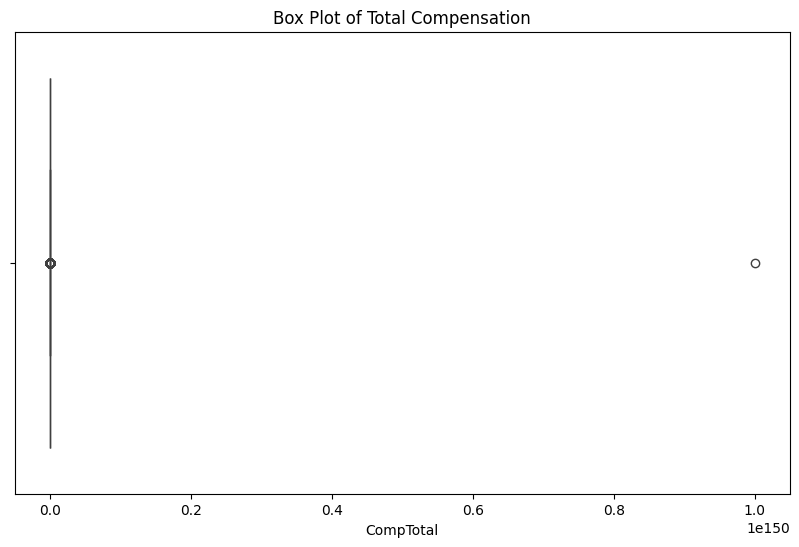

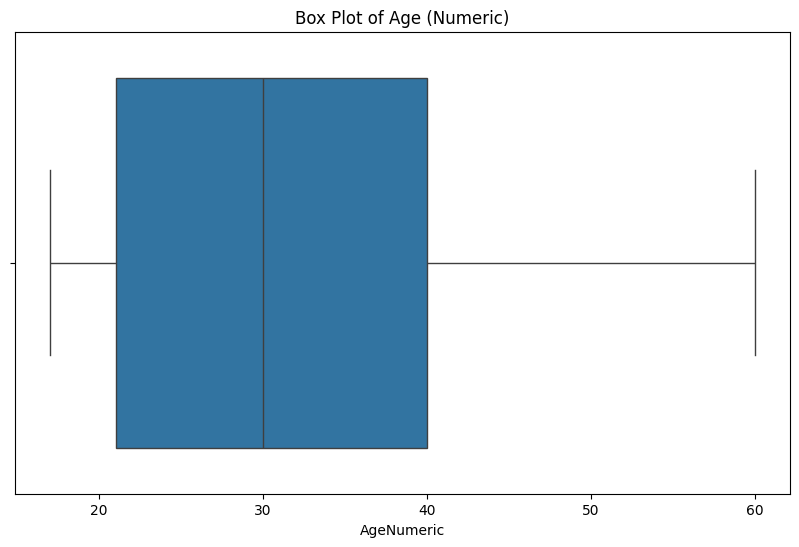

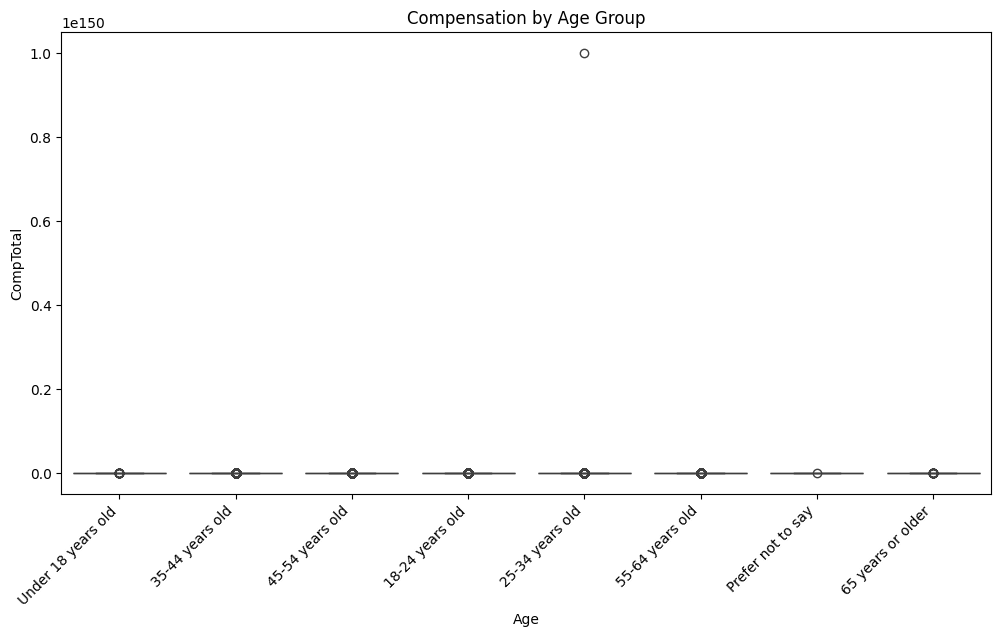

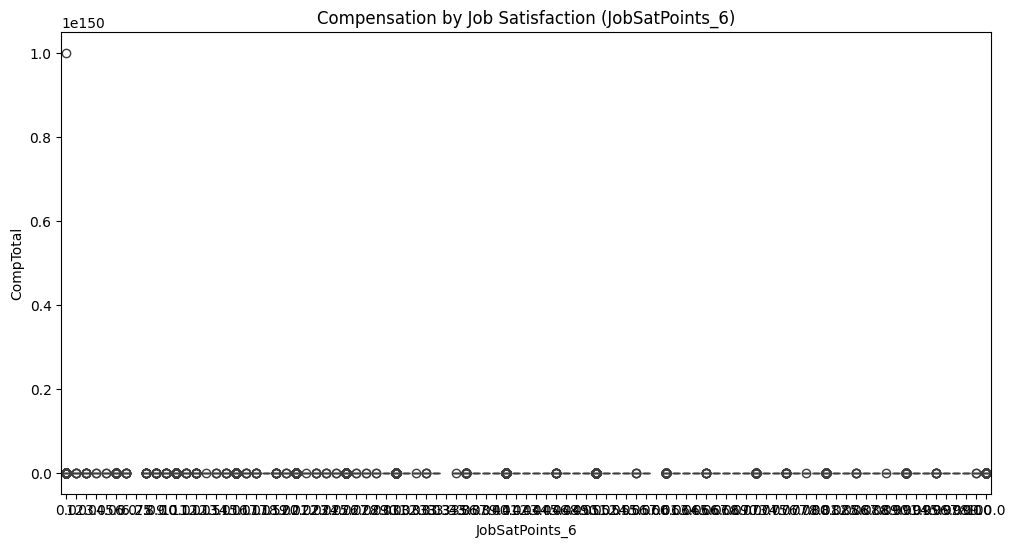

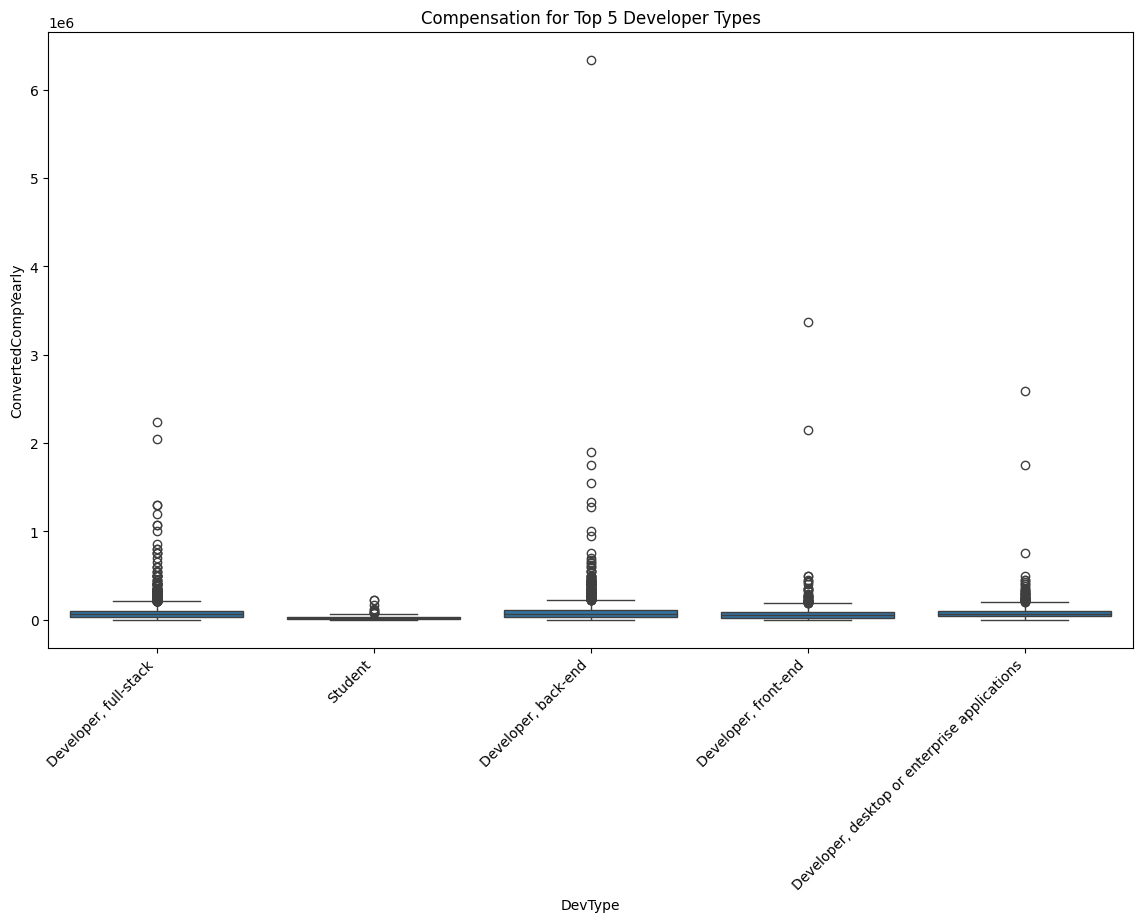

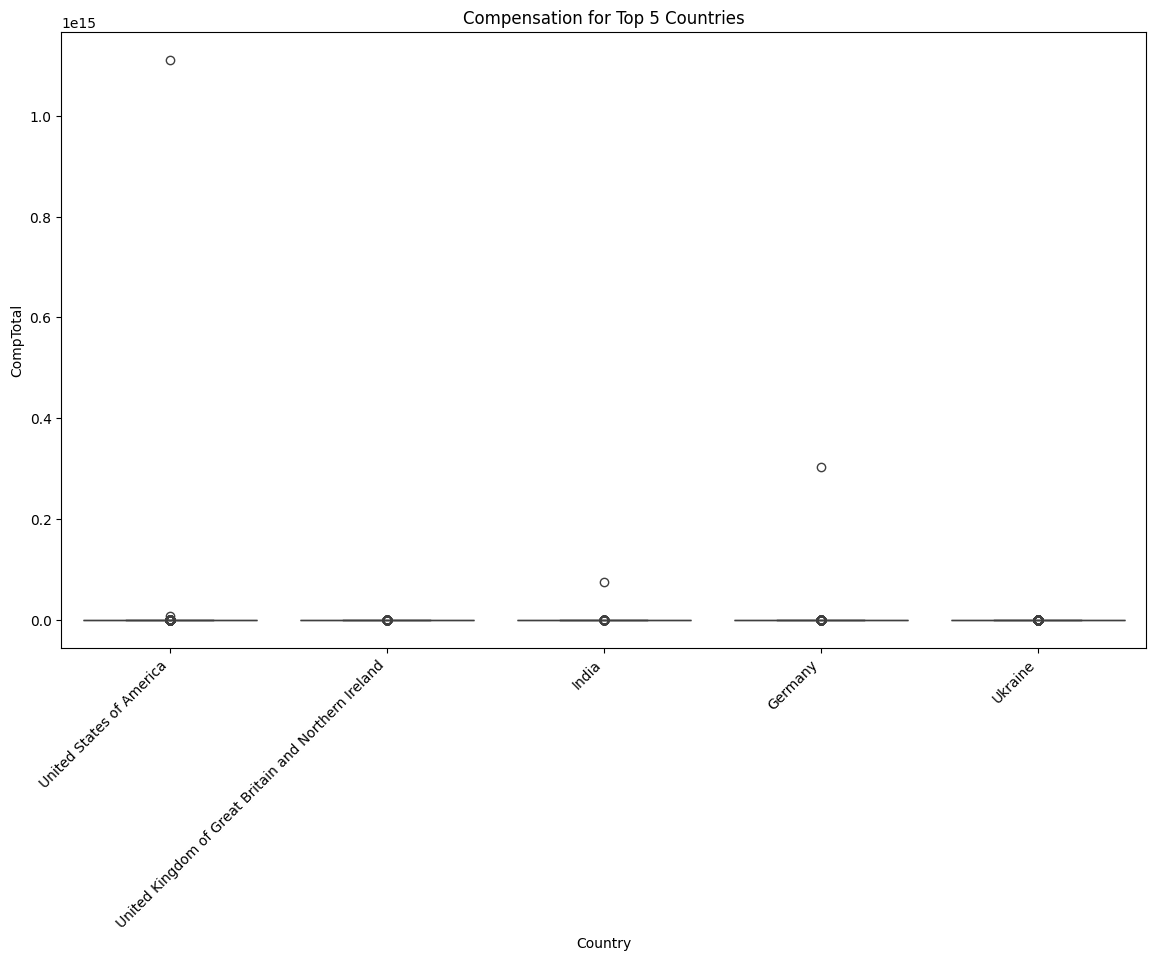

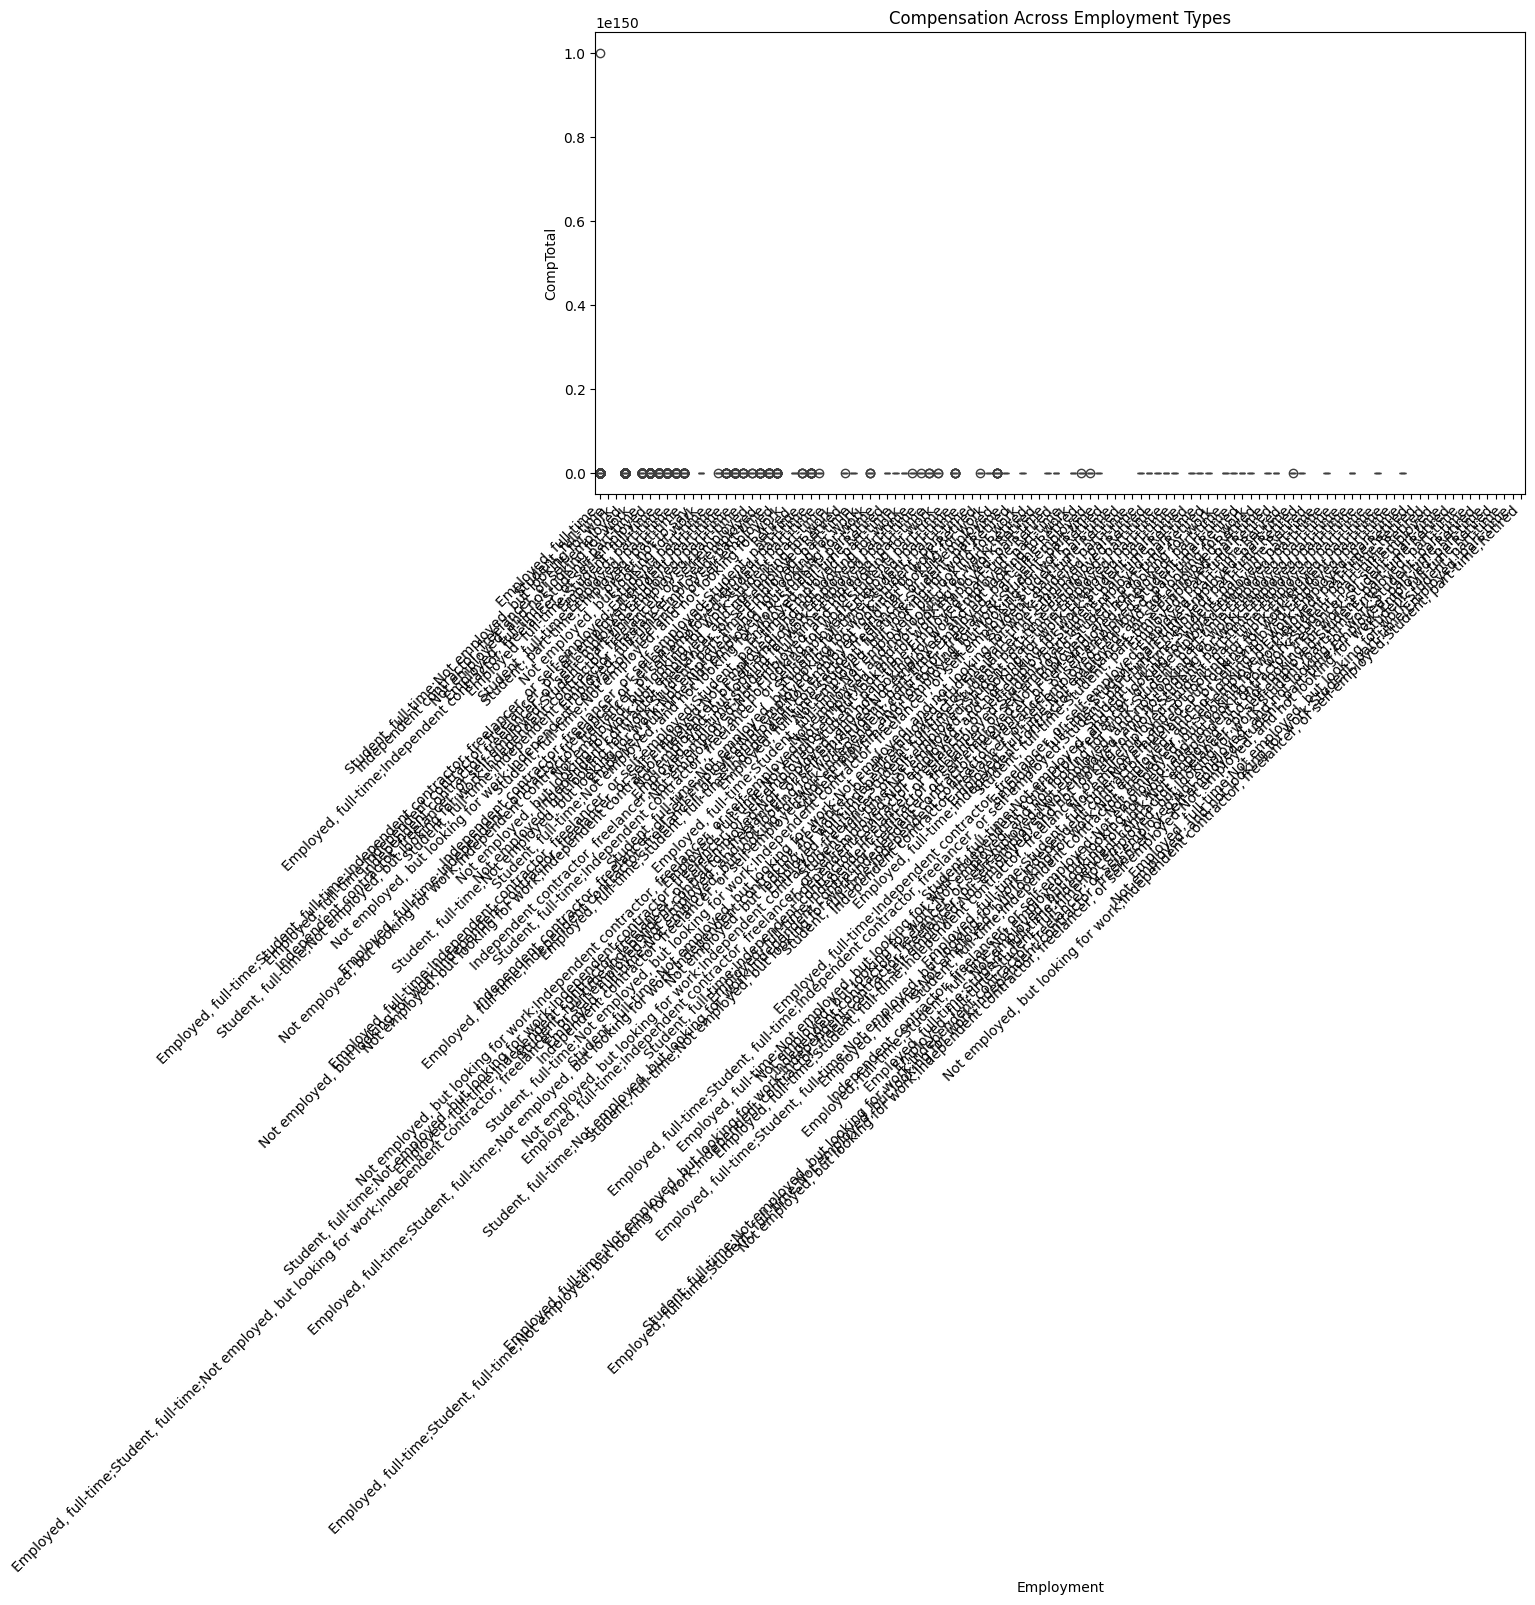

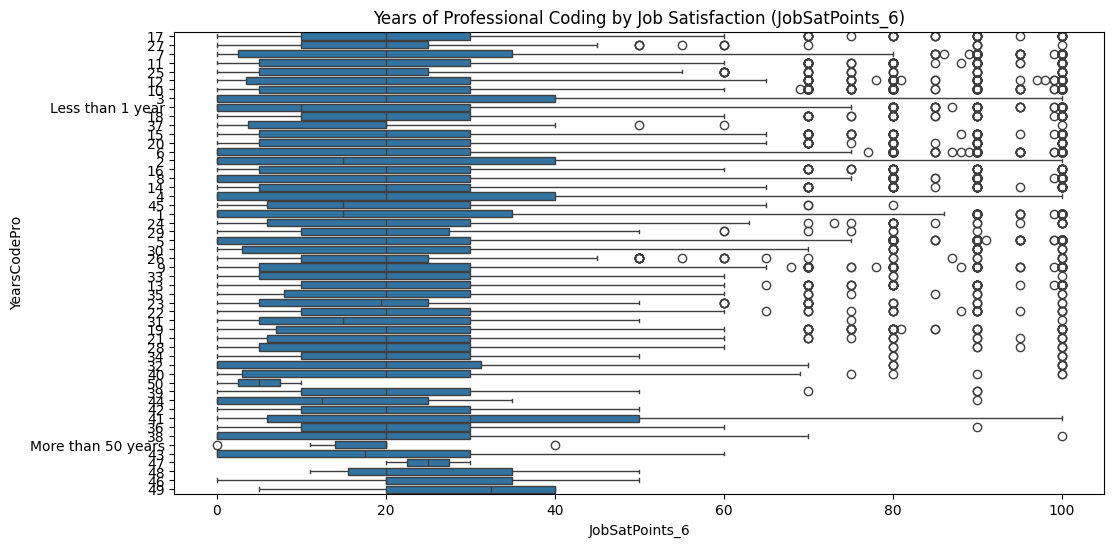

Database connection closed.


In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
from tqdm import tqdm

def download_database(url, db_name="survey_results.sqlite"):
    """Downloads the database file if it doesn't exist."""
    if not os.path.exists(db_name):
        print(f"Downloading {db_name}...")
        try:
            response = requests.get(url, stream=True)
            response.raise_for_status()
            total_size = int(response.headers.get('content-length', 0))
            with open(db_name, 'wb') as file, tqdm(desc=db_name, total=total_size, unit='iB', unit_scale=True, unit_divisor=1024) as bar:
                for data in response.iter_content(chunk_size=8192):
                    size = file.write(data)
                    bar.update(size)
            print("Download complete.")

        except requests.exceptions.RequestException as e:
            print(f"Download error: {e}")
            return

    else:
        print(f"{db_name} already exists. Skipping download.")

# Download the database
database_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite'
download_database(database_url)

def connect_to_database(db_name="survey_results.sqlite"):
    """Connects to the SQLite database and returns the connection."""
    try:
        conn = sqlite3.connect(db_name)
        return conn
    except sqlite3.Error as e:
        print(f"Connection error: {e}")
        return None


def execute_query(conn, query):
  """Executes an SQL query and fetches all results."""
  try:
      cursor = conn.cursor()
      cursor.execute(query)
      results = cursor.fetchall()
      return results
  except sqlite3.Error as e:
      print(f"Query execution error: {e}")
      return None

# Connect to the database
conn = connect_to_database()



def count_rows(conn, table_name):
    """Counts the number of rows in the given table."""
    query = f"SELECT COUNT(*) FROM {table_name}"
    result = execute_query(conn, query)
    if result:
      print(f"Number of rows in '{table_name}': {result[0][0]}")




def list_tables(conn):
    """Lists all tables in the database."""
    query = "SELECT name FROM sqlite_master WHERE type='table'"
    tables = execute_query(conn, query)

    if tables:
      print("Tables in the database:")
      for table in tables:
          print(table[0])


def group_by_age(conn, table_name):
    """Groups data by age and counts the respondents in each age group."""
    query = f"SELECT Age, COUNT(*) AS NumRespondents FROM {table_name} GROUP BY Age ORDER BY Age"
    age_groups = execute_query(conn, query)
    if age_groups:
      print("\nRespondents grouped by age:")
      for age, count in age_groups:
          print(f"{age}: {count}")





# Perform basic queries if the connection was successful
if conn:
    table_name = "main" # Corrected table name

    count_rows(conn, table_name)
    list_tables(conn)
    group_by_age(conn, table_name)

    #-------Visualization Task-----------#
    # Task 1: Distribution
    df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['CompTotal'])
    plt.title('Box Plot of Total Compensation')
    plt.show()

    #Converting Age to numeric and visualizing
    age_mapping = {  # Updated Age mapping with numerical value for "Prefer not to say"
        'Under 18 years old': 17,
        '18-24 years old': 21,
        '25-34 years old': 30,
        '35-44 years old': 40,
        '45-54 years old': 50,
        '55-64 years old': 60,
        '65-74 years old': 70,
        '75 years or older': 75,
        'Prefer not to say': None  # or another value
    }

    df['AgeNumeric'] = df['Age'].map(age_mapping).astype(float) #astype float for numeric operations

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['AgeNumeric']) #using numeric age
    plt.title('Box Plot of Age (Numeric)')
    plt.show()




    # Task 2: Relationships
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Age', y='CompTotal', data=df)
    plt.title('Compensation by Age Group')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df)
    plt.title('Compensation by Job Satisfaction (JobSatPoints_6)')
    plt.show()


    # Task 3: Composition
    top_5_dev_types = df['DevType'].value_counts().nlargest(5).index
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df[df['DevType'].isin(top_5_dev_types)])
    plt.title('Compensation for Top 5 Developer Types')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    top_5_countries = df['Country'].value_counts().nlargest(5).index
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Country', y='CompTotal', data=df[df['Country'].isin(top_5_countries)])
    plt.title('Compensation for Top 5 Countries')
    plt.xticks(rotation=45, ha='right')
    plt.show()



    # Task 4: Comparison
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Employment', y='CompTotal', data=df)
    plt.title('Compensation Across Employment Types')
    plt.xticks(rotation=45, ha='right')
    plt.show()


    plt.figure(figsize=(12, 6))
    sns.boxplot(x='JobSatPoints_6', y='YearsCodePro', data=df)
    plt.title('Years of Professional Coding by Job Satisfaction (JobSatPoints_6)')
    plt.show()



    conn.close()
    print("Database connection closed.")